In [1]:
#보팅_분류기
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    # 중복된 feature 이름 처리: 이름 뒤에 _0, _1, ... 등의 suffix 추가
    feature_dup_df = old_feature_name_df.groupby('column_name').cumcount()
    new_feature_name_df = old_feature_name_df.copy()
    new_feature_name_df['column_name'] = new_feature_name_df['column_name'] + "_" + feature_dup_df.astype(str)
    return new_feature_name_df

def get_human_dataset(base_path='./data/UCI-HAR_Dataset/'):
    # 피처 이름 로딩
    feature_path = base_path + 'features.txt'
    feature_name_df = pd.read_csv(feature_path, sep='\s+', header=None, names=['column_index', 'column_name'])

    # 중복 피처명 처리
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_names = new_feature_name_df['column_name'].tolist()

    # 학습/테스트 데이터 로딩
    X_train = pd.read_csv(base_path + 'train/X_train.txt', sep='\s+', names=feature_names)
    X_test = pd.read_csv(base_path + 'test/X_test.txt', sep='\s+', names=feature_names)

    y_train = pd.read_csv(base_path + 'train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv(base_path + 'test/y_test.txt', sep='\s+', header=None, names=['action'])

    return X_train, X_test, y_train, y_test

In [82]:
#랜덤 포레스트 모델만들기
from sklearn.ensemble import RandomForestClassifier
rf_clf =RandomForestClassifier(random_state=100, max_depth=105)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
accuracy_score(y_test, rf_pred)

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9321343739395996

In [97]:
rf_clf_new_params = RandomForestClassifier(n_estimators=350,  # Increased number of trees
                                           max_depth=30,      # Reduced max depth
                                           min_samples_leaf=1, # Minimum samples per leaf
                                           random_state=10,
                                           min_samples_split=5)

rf_clf_new_params.fit(X_train, y_train)
rf_pred_new_params = rf_clf_new_params.predict(X_test)
accuracy = accuracy_score(y_test, rf_pred_new_params)
print(f"Accuracy with new parameters: {accuracy}")

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy with new parameters: 0.9317950458092976


In [ ]:
# 5. 교차 검증(Cross-Validation) 추가
# cross_val_score를 사용하여 교차 검증 점수를 계산합니다.
# cv=5는 5-폴드 교차 검증을 의미합니다. (데이터를 5개로 나누어 5번 학습/평가)
# scoring='accuracy'는 평가 지표로 정확도를 사용하겠다는 의미입니다.
print("\n--- 교차 검증(Cross-Validation) 결과 ---")
cv_scores = cross_val_score(rf_clf_new_params, X_train, y_train, cv=5, scoring='accuracy')

print(f"각 폴드별 교차 검증 정확도: {cv_scores}")
print(f"교차 검증 평균 정확도: {cv_scores.mean():.4f}")
print(f"교차 검증 정확도 표준 편차: {cv_scores.std():.4f}")




--- 교차 검증(Cross-Validation) 결과 ---


NameError: name 'cross_val_score' is not defined

In [15]:
X_train, X_test, y_train, y_test = get_human_dataset()

print(X_train.shape, X_test.shape)
print(y_train['action'].value_counts())

(7352, 561) (2947, 561)
action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [64]:
# 피처 중요도 출력
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances(model, feature_names, top_n=20):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1][:top_n]
    plt.figure(figsize=(10, top_n * 0.4))  # 피처 수에 따라 자동 높이 조절

    plt.barh(range(top_n), importances[indices][::-1], align='center')
    plt.yticks(range(top_n), np.array(feature_names)[indices][::-1])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Top {top_n} Feature Importances')
    plt.tight_layout()
    plt.show()

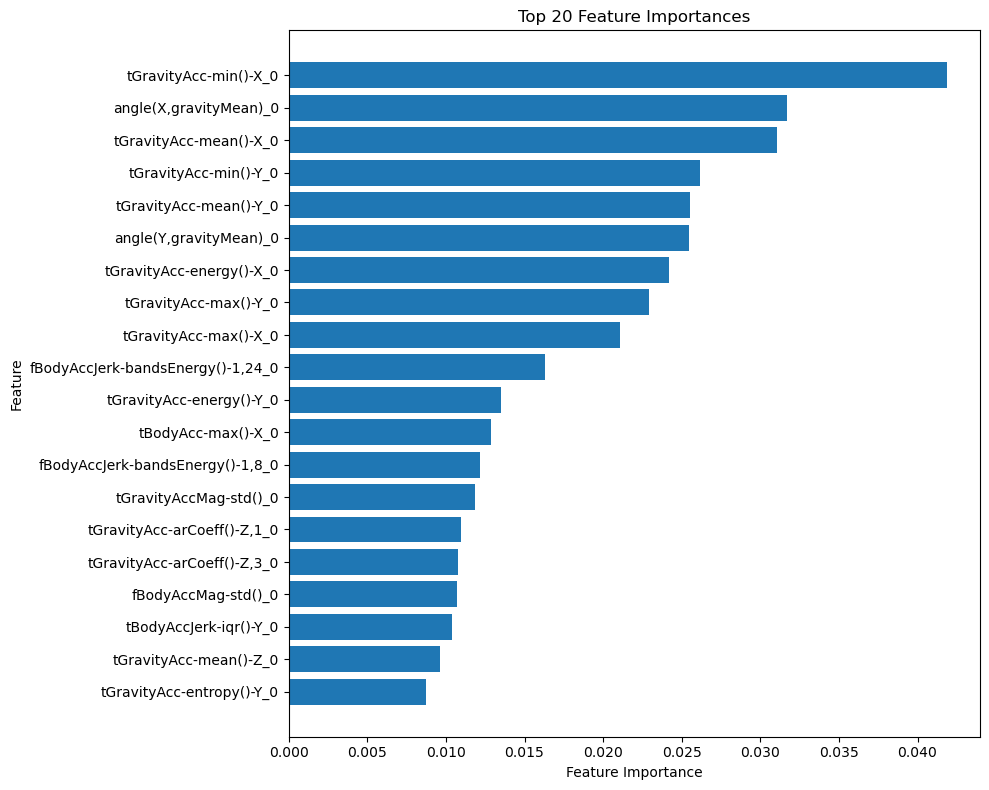

In [65]:
plot_feature_importances(rf_clf, feature_names=X_train.columns)

# GBM

In [ ]:
# xgboost

import xgboost
print(xgboost.__version__)




1.6.2


In [105]:
from xgboost import XGBClassifier

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = get_human_dataset()

print(X_train.shape, X_test.shape)
print(y_train['action'].value_counts())

(7352, 561) (2947, 561)
action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [108]:
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
accuracy_score(y_test, gb_pred)

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9392602646759416

In [117]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances(model, feature_names, top_n=20):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1][:top_n]
    plt.figure(figsize=(10, top_n * 0.4))  # 피처 수에 따라 자동 높이 조절

    plt.barh(range(top_n), importances[indices][::-1], align='center')
    plt.yticks(range(top_n), np.array(feature_names)[indices][::-1])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Top {top_n} Feature Importances')
    plt.tight_layout()
    plt.show()

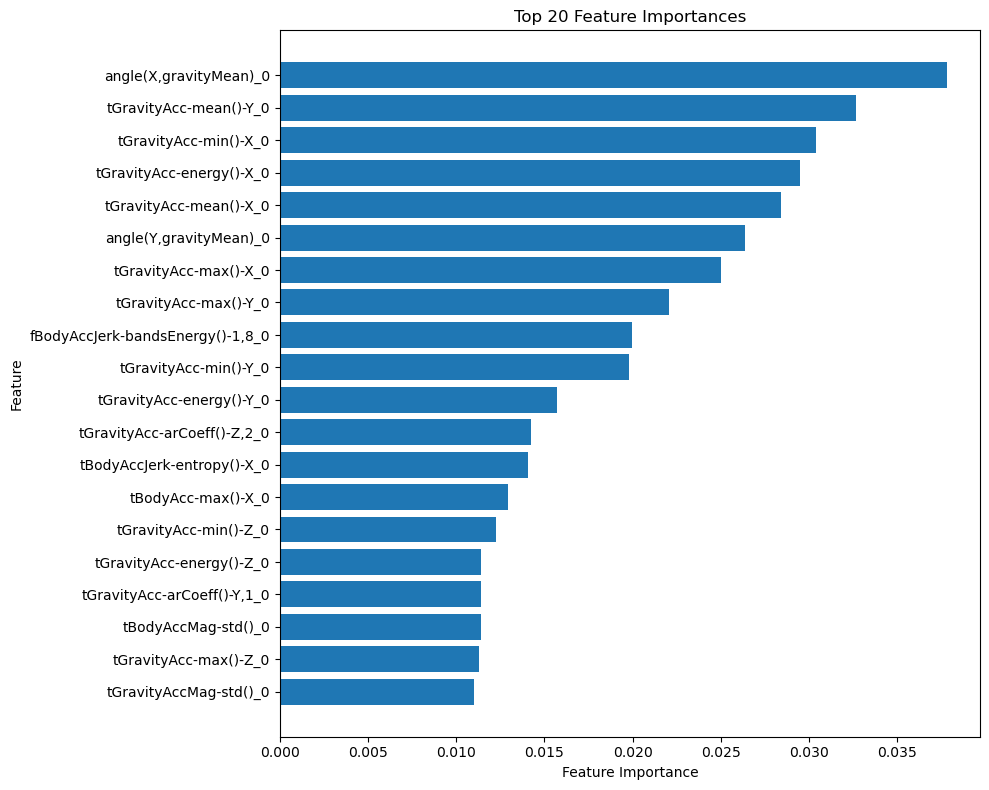

In [118]:
plot_feature_importances(rf_clf, feature_names=X_train.columns)

In [157]:
import os
os.chdir('C:/githome/hipython_rep/')

In [139]:
import re
def clean_feature_name(name):
    # 특수문자 제거: 괄호, 콤마, 하이픈 등
    return re.sub('[^A-Za-z0-9_]+', '_', name)

In [140]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    # new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
    #   
    # 중복 이름 처리 + 특수문자 제거
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(
        lambda x: clean_feature_name(x[0] + ('_' + str(x[1]) if x[1] > 0 else '')), axis=1
    )
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [156]:
feature_name_df = pd.read_csv('./data/UCI-HAR_Dataset/features.txt', sep='\s+' ,
                              header=None, names=['column_index', 'column_name'])

new_feature_name_df = get_new_feature_name_df(feature_name_df)

X_train = pd.read_csv('./data/UCI-HAR_Dataset/train/X_train.txt')
X_test =  pd.read_csv('./data/UCI-HAR_Dataset/test/X_test.txt')

FileNotFoundError: [Errno 2] No such file or directory: './data/UCI-HAR_Dataset/features.txt'